I will do some practice with Time Series. A Series is STATIONARY when the following statical averages are COSTANT:

- MEAN
- VARIANCE
- AUTOCORRELATION

If one of theese statistical concepts are not CONSTANT mean that there is not stationarity. 
Also a TIME SERIES is not STATIONARY if there is a TREND

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
brk = pd.read_csv('/Users/soledadmusella/Desktop/time-series-practice/brk_stock_data_ copy.csv',skiprows=14)
brk.tail()

,date,open,high,low,close,volume
10105,2020-04-13,290950.01,290950.01,279060.00,282800.00,565
10106,2020-04-14,291400.00,291533.33,286392.75,289730.26,672
10107,2020-04-15,284500.00,284500.00,281201.01,283750.00,562
10108,2020-04-16,283750.00,283750.99,278800.00,282281.99,779
10109,2020-04-17,289585.01,289585.01,283600.00,284400.00,819


In [3]:
brk.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

First step is to reversing date format into string

In [4]:
brk['date'] = pd.to_datetime(brk['date'],format='%Y-%m-%d')
print(brk['date'][0],brk['date'].dtype)

1980-03-17 00:00:00 datetime64[ns]


Second step is to set the date as an Index

In [5]:
brk = brk.set_index('date')
brk.head(3)

,open,high,low,close,volume
date,,,,,
1980-03-17,290.0,310.0,290.0,290.0,10000
1980-03-18,290.0,290.0,290.0,290.0,0
1980-03-19,290.0,310.0,290.0,290.0,20000


### First method to solve NON STATIONARITY: DIFFERENCING

In this technique, we take the difference of an observation at a particular time instant with that at the previous instant

Use when there is an existing trend. The drift will became the average
- X(t)-X(t-n)


In [6]:
brk['volume_diff'] = brk['volume'].diff(1)
brk.head()

,open,high,low,close,volume,volume_diff
date,,,,,,
1980-03-17,290.0,310.0,290.0,290.0,10000,NaN
1980-03-18,290.0,290.0,290.0,290.0,0,-10000.0
1980-03-19,290.0,310.0,290.0,290.0,20000,20000.0
1980-03-20,290.0,290.0,290.0,290.0,0,-20000.0
1980-03-21,290.0,290.0,290.0,290.0,0,0.0


let's make it as a loop

In [7]:
brk = brk.resample('1w').mean()
for col in list(['close','volume']):
    brk[col+'_diff'] = brk[col].diff(1)
brk[['close_diff','volume_diff']].head()

,close_diff,volume_diff
date,,
1980-03-23,NaN,NaN
1980-03-30,-20.0,-4000.0
1980-04-06,-10.0,10500.0
1980-04-13,3.0,11500.0
1980-04-20,-12.0,-10000.0


In [8]:
brk['prev_day_close'] =  brk['close'].shift(1)
brk['close_diff'] =  brk['close'] - brk['prev_day_close']
brk['daily_returns'] = (brk['close'] / brk['prev_day_close'] -1) *100

In [9]:
brk.head()

,open,high,low,close,volume,volume_diff,close_diff,prev_day_close,daily_returns
date,,,,,,,,,
1980-03-23,290.0,298.0,290.0,290.0,6000.0,NaN,NaN,NaN,NaN
1980-03-30,274.0,274.0,270.0,270.0,2000.0,-4000.0,-20.0,290.0,-6.896552
1980-04-06,262.5,275.0,260.0,260.0,12500.0,10500.0,-10.0,270.0,-3.703704
1980-04-13,264.0,279.0,263.0,263.0,24000.0,11500.0,3.0,260.0,1.153846
1980-04-20,254.0,267.0,251.0,251.0,14000.0,-10000.0,-12.0,263.0,-4.562738


### Substracting the rolling mean

With this method you can calculate the rolling mean and subtract it from the time series to make sure your time series is stationary

By moving average/variance we mean at any point in time  𝑡 , we can take the average/variance of the  𝑚  last time periods.  𝑚  is then known as the window size.

In [10]:
brk[-10:].rolling(window = 6).mean()

,open,high,low,close,volume,volume_diff,close_diff,prev_day_close,daily_returns
date,,,,,,,,,
2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-22,312907.382417,317206.514500,307659.405083,312680.964667,606.425000,154.066667,-12543.100333,325224.065000,-4.000141
2020-03-29,299796.849083,305444.138500,294182.247083,300054.466667,736.825000,130.400000,-12626.498000,312680.964667,-4.028892
2020-04-05,287486.077000,293639.589333,281659.921667,287889.633333,797.733333,60.908333,-12164.833333,300054.466667,-3.824027
2020-04-12,280532.366667,287045.803583,274915.355167,281460.225000,794.825000,-2.908333,-6429.408333,287889.633333,-1.970174


In [11]:
brk[-10:].rolling(window = '6d',min_periods=6).mean()

,open,high,low,close,volume,volume_diff,close_diff,prev_day_close,daily_returns
date,,,,,,,,,
2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for Stationarity: The Dickey-Fuller Test

The Dickey-Fuller test is a statistical test for testing stationarity. The null-hypothesis for the test is that the time series is not stationary. So if the test statistic is less than the critical value, we reject the null hypothesis and say that the series is stationary.

In [12]:
from statsmodels.tsa.stattools import adfuller


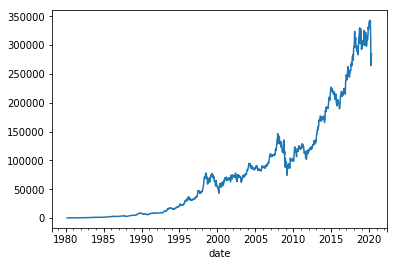

In [13]:
brk = brk.resample('1w').mean()
ts = brk['close']
ts.plot()

In [17]:
from statsmodels.tsa.stattools import adfuller
adfuller(ts)

(1.7387387886846526,
 0.9982194516556845,
 26,
 2065,
 {'1%': -3.4335206767270354,
  '5%': -2.862940658476002,
  '10%': -2.5675156466298095},
 38099.688098799576)

In [ ]:
# first value is the test statistic : 1.738738788684652
# is much higher that all the values that we have for alfa that is the critical value 1%': -3.4335206767270354,
# '5%': -2.862940658476002,
# '10%': -2.5675156466298095
# This mean that we have to reject the null hp of stationarity 

The time series is not stationary

### Detrending

### log

0.006375347657070067

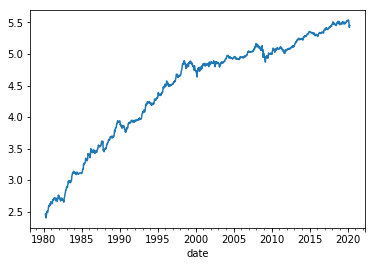

In [15]:
ts_log = np.log10(ts)
ts_log.plot()
adfuller(ts_log)[1]

In [16]:
# after applying log to our data is possible to see that the time series is not anymore steep as it was before
# and become much flatter

In [18]:
from statsmodels.tsa.stattools import adfuller
adfuller(ts_log)

(-3.56932201220813,
 0.006375347657070067,
 2,
 2089,
 {'1%': -3.4334842047036167,
  '5%': -2.8629245552811486,
  '10%': -2.5675070726005353},
 -12837.023226421727)

In [19]:
# if I calculate again adfuller test I can see that now the test statistic is much lower than before: -3.56932201220813
# and I can reject the null hp for all the 3 values of alpha

In [20]:
# I still have a trend but DK Fuller is not that good in detecting trends

### Decomposing

80531.6179403257 1.0000515794553082 0.9972339488739259


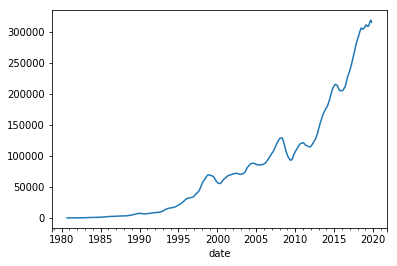

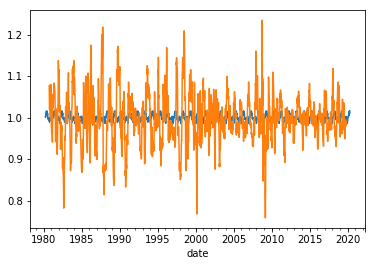

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

print(trend.mean(),seasonal.mean(),residual.mean())

trend.plot()
plt.show()
seasonal.plot()
residual.plot()
plt.show()


4.457514455213187 1.0000056104038584 1.000053951397574


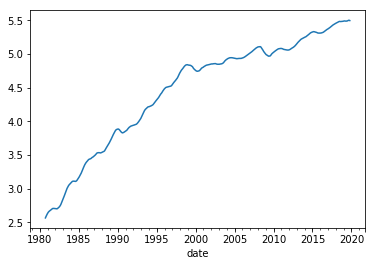

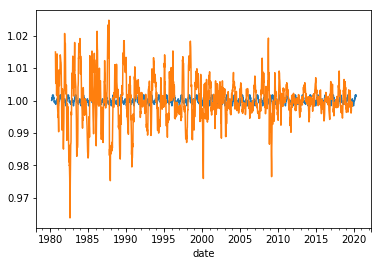

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

print(trend.mean(),seasonal.mean(),residual.mean())

trend.plot()
plt.show()
seasonal.plot()
residual.plot()
plt.show()

In [22]:
# this time by applying the decomposition to ts_log I can see that the time series is less steep